<a href="https://colab.research.google.com/github/israellmorais/RedesNeurais/blob/main/PerceptronHingeloss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np

def geradataset(tamanho):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
    return X, y

In [22]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(CustoPerceptron.erro(y, ypred), X)

class HingeLoss():
    @staticmethod
    def erro(y, ypred):
        return np.multiply(y, ypred)
    @staticmethod
    def custo(y, ypred):
        return np.sum(1 - HingeLoss.erro(y, ypred))
    @staticmethod
    def gradiente(y, ypred, X):
        marginais = HingeLoss.erro(y, ypred) < 1
        return np.matmul(y[marginais], X[marginais])

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=CustoPerceptron()):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.1
        self.maxiter = 100
        self.custo = custo

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=2)
        for _ in range(self.maxiter):
            if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
                ypred = self.preactivate(X)
            else: 
                ypred = self.predict(X) 
            custo = self.custo.custo(y, ypred)
            print("Custo: ", custo)
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, X)
            if custo==0:
                break
    
    def preactivate(self, X):
        return np.matmul(X, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred


In [23]:
import matplotlib.pyplot as plt

def plotadataset(X, y):
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def plotavetor(vetor, cor="k"):
    origem = [0,0]
    plt.arrow(*origem, *vetor, color=cor)

vetor = [1, -1]

def perpendicular(vetor):
    perp = np.array(vetor[::-1])
    perp[0] *= -1
    return perp



In [62]:
def Executar(Xteste, yteste, Xtreino, ytreino, custo):


  perceptron = Perceptron(custo)

  perceptron.fit(Xteste, yteste)
  print("\nHiperplano: ", perceptron.w, "\n")
  plotadataset(Xteste, yteste)
  plotavetor(perpendicular(perceptron.w))
  plt.show()

  ypred = perceptron.predict(Xtreino)
  print("\nAcurácia: ", sum(ytreino == ypred)/len(ytreino), "\n")

  print("\nHiperplano: ", perceptron.w, "\n")
  plotadataset(Xtreino, ytreino)
  plotavetor(perpendicular(perceptron.w))
  plt.show()


In [63]:
Xteste, yteste = geradataset(20)
Xtreino, ytreino = geradataset(1000)

Perceptron

Custo:  32
Custo:  48
Custo:  20
Custo:  4
Custo:  16
Custo:  12
Custo:  4
Custo:  8
Custo:  4
Custo:  4
Custo:  8
Custo:  4
Custo:  0

Hiperplano:  [ 1.13927503 -1.28294083] 



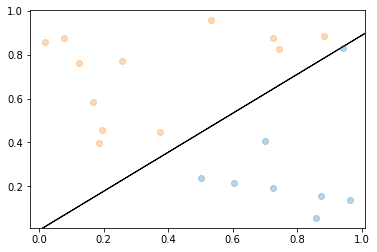


Acurácia:  0.95 


Hiperplano:  [ 1.13927503 -1.28294083] 



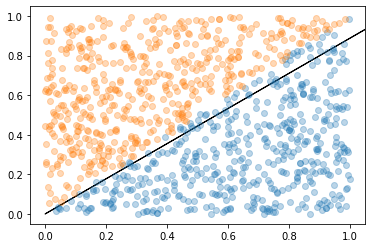

In [66]:
print("Perceptron\n")

Executar(Xteste, yteste, Xtreino, ytreino, CustoPerceptron())

HingeLoss


Custo:  24
Custo:  24
Custo:  22
Custo:  16
Custo:  0

Hiperplano:  [ 0.56119423 -0.57879297] 



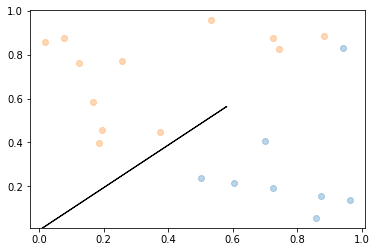


Acurácia:  0.984 


Hiperplano:  [ 0.56119423 -0.57879297] 



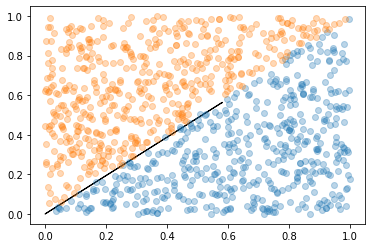

In [68]:
print("HingeLoss\n\n")

Executar(Xteste, yteste, Xtreino, ytreino, HingeLoss())


#Questões:

###1 - Em qual caso você obteve a melhor acurácia, e por quê?

No exercício o HingeLoss obteve uma melhor acurácia do que o Perceptron. Isso ocorreu porque o HingeLoss conseguiu definir o hiperplano de forma melhor do que o Perceptron, visível através dos gráficos.



###2 - Em qual caso você acha que a classificação dos mesmos 1000 pontos de teste não será significativamente diferente se o algoritmo for treinado com 20 pontos diferentes, também gerados aleatoriamente?

Quando conseguirem definir corretamente o hiperplano, em especial quando os dados estiverem bem descolados da linha definida pelo hiperplano. Porém, se tivermos mais dados de teste o Perceptron pode conseguir definir melhor o hiperplano e dar valores de acurácia melhores.